In [94]:
from _library.utils import SYSTEM_NAMES, SUBFOLDERS, load_datasets

In [95]:
import matplotlib.pyplot as plt

In [96]:
import pandas as pd
import numpy as np

# try on ACEA old

# Select the PV System

In [97]:
print(SYSTEM_NAMES)
# --- 0 ---------- 1 ---------- 2 ----- 3 ------ 4 --------- 5 -------- 6 --------- 7 ----

['Binetto 1', 'Binetto 2', 'Soleto 1', 'Soleto 2', 'Galatina']


In [98]:
system_name = SYSTEM_NAMES[2]
print(f"PV SYSTEM --> {system_name}")

PV SYSTEM --> Soleto 1


# Loading the dataset

In [61]:
# Loading the datasets
system_path, inv_data, inv_names, *_ = load_datasets(system_name, subfolder = "1-hour averaged sampling")

-------------------------------------------------------------------------------- 
				PV SYSTEM --> SOLETO 1 
--------------------------------------------------------------------------------

Loading inverter data...
SOLETO 1: OK, component data loaded (4) --> INV1, INV2, INV3, INV4
-------------------------------------------------------------------------------- 
FINISHED!: All datasets have been loaded. (SYS: 4 - IRR FILE: 0)
--------------------------------------------------------------------------------
-------------------------------------------------------------------------------- 
EXAMPLE --> Soleto 1: INV1 (FROM '2018-08-08' TO '2021-06-30': 1057 days).
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15586 entries, 0 to 15585
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date/Tim

# Various changes

In [62]:
for inv_name in inv_names:
    df = inv_data[inv_name]
    
    # Compute the power --> P = V * A --> Power = Voltage * Ampere
    power = df["Vcc 1 (V)"] * df["Cc 1 (A)"]
    
    # Transform the WATT (W) into KILOWATT (kW)
    kilowatt = power / 1000
    df.insert(11, "DC Power (kW)", kilowatt)
    print(f"\n{inv_name}: Added the computed column 'DC Power (kW)' in the data (i.e., P = V *A ).")
    
    # Columns to drops 
    columns_to_drop = [
        "Allarme",
#        "Humidity (%)",
        "Atmospheric Pressure (hPa)",
        "Rainfall (mm)",
        "Wind speed (m/s)",
        "Wind direction (°)"
    ] 
    inv_data[inv_name] = df.drop(columns = columns_to_drop)
    print(f"{inv_name}: Delated {len(columns_to_drop)} colums:", ", ".join(columns_to_drop))


INV1: Added the computed column 'DC Power (kW)' in the data (i.e., P = V *A ).
INV1: Delated 5 colums: Allarme, Atmospheric Pressure (hPa), Rainfall (mm), Wind speed (m/s), Wind direction (°)

INV2: Added the computed column 'DC Power (kW)' in the data (i.e., P = V *A ).
INV2: Delated 5 colums: Allarme, Atmospheric Pressure (hPa), Rainfall (mm), Wind speed (m/s), Wind direction (°)

INV3: Added the computed column 'DC Power (kW)' in the data (i.e., P = V *A ).
INV3: Delated 5 colums: Allarme, Atmospheric Pressure (hPa), Rainfall (mm), Wind speed (m/s), Wind direction (°)

INV4: Added the computed column 'DC Power (kW)' in the data (i.e., P = V *A ).
INV4: Delated 5 colums: Allarme, Atmospheric Pressure (hPa), Rainfall (mm), Wind speed (m/s), Wind direction (°)


In [63]:
for inv_name in inv_names:
    df = inv_data[inv_name]

    # Set the indexes
    df.index = df["Date/Time"]
    df.drop(columns="Date/Time", inplace=True)

    # Consider all the columns apart from the one concerning the AC/DC voltages
#    columns = df.columns.tolist()
#    columns_to_not_cosider = ["Vac R (V)", "Vac S (V)", "Vac T (V)", "Vcc 1 (V)"]
#    [columns.remove(column) for column in columns_to_not_cosider]
    
#    inv_data[inv_name] = df[columns] 

In [64]:
for inv_name in inv_names[:1]:
    df = inv_data[inv_name]
    
    df.info()
    display(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15586 entries, 2018-08-08 11:00:00 to 2021-06-30 22:00:00
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Iac R (A)            15586 non-null  int64  
 1   Iac S (A)            15586 non-null  int64  
 2   Iac T (A)            15586 non-null  int64  
 3   Vac R (V)            15586 non-null  int64  
 4   Vac S (V)            15586 non-null  int64  
 5   Vac T (V)            15586 non-null  int64  
 6   Pac R (kW)           15586 non-null  int64  
 7   E. totale (kWh)      15586 non-null  float64
 8   Cc 1 (A)             15586 non-null  int64  
 9   Vcc 1 (V)            15586 non-null  int64  
 10  DC Power (kW)        15586 non-null  float64
 11  Inverter temp. (°C)  15586 non-null  int64  
 12  Irradiance (W/mq)    15586 non-null  int64  
 13  Amb. Temp (°C)       15586 non-null  float64
 14  Humidity (%)         15087 non-null  float64
dtypes

,Iac R (A),Iac S (A),Iac T (A),Vac R (V),Vac S (V),Vac T (V),Pac R (kW),E. totale (kWh),Cc 1 (A),Vcc 1 (V),DC Power (kW),Inverter temp. (°C),Irradiance (W/mq),Amb. Temp (°C),Humidity (%)
Date/Time,,,,,,,,,,,,,,,
2018-08-08 11:00:00,436,419,412,118,117,117,150,2.963936e+06,401,388,155.588,31,1037,35.80,23.73
2018-08-08 12:00:00,464,449,440,118,116,117,160,2.964033e+06,439,380,166.820,32,1056,35.72,25.46
2018-08-08 13:00:00,501,483,473,117,116,117,172,2.964188e+06,485,372,180.420,35,1049,36.34,26.37
2018-08-08 14:00:00,497,481,472,117,116,116,170,2.964383e+06,477,376,179.352,35,1050,35.34,30.41
2018-08-08 15:00:00,273,266,261,116,115,116,94,2.964518e+06,265,376,99.640,34,993,33.35,35.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 18:00:00,127,126,123,113,113,114,43,3.907287e+06,112,404,45.248,37,219,35.00,32.63
2021-06-30 19:00:00,68,68,67,113,112,113,23,3.907324e+06,64,406,25.984,37,133,32.88,44.55
2021-06-30 20:00:00,11,10,10,112,112,112,4,3.907337e+06,11,408,4.488,37,48,29.10,73.56


In [65]:
df = df[['Cc 1 (A)', 'Vcc 1 (V)','Irradiance (W/mq)', 'Amb. Temp (°C)']].rename(columns ={'Irradiance (W/mq)':'Geff', 'Amb. Temp (°C)':'Tcell'})

In [66]:
#### coefficients
alfa = 0.06 #Temperature coefficient of the short circuit current Isc
beta = -0.37 #Temperature coefficient of the open circuit voltage Voc
gamma = -0.45 #Temperature coefficient of the MPP power Pmpp

### parameters
V_mpp = 29.5   ###Voltage at Pmax, Vmpp [V]
I_mpp = 7.63   ###Current at Pmax, Impp
V_oc = 36.5    ###Open circuit voltage Voc
I_sc = 8.28    ###Short circuit current Isc

In [67]:
df_iv = df[['Cc 1 (A)', 'Vcc 1 (V)', 'Geff','Tcell']]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f034d415640>,
 'caps': [<matplotlib.lines.Line2D at 0x7f034d415d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f034d4152b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f034d3db4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f034d3db850>],
 'means': []}

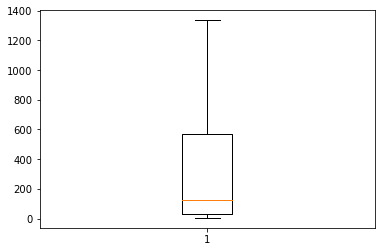

In [68]:
plt.boxplot(df_iv['Geff'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f034b43b430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f034b43beb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f034b43b4c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f03575a1760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f03575a1910>],
 'means': []}

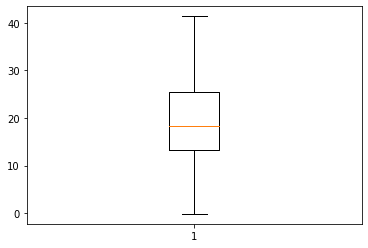

In [69]:
plt.boxplot(df_iv['Tcell'])

In [70]:
df_iv['Tcell'] = 30 + 0.0175*(df_iv['Geff']-300) + (1.14*df_iv['Tcell']-25)

In [71]:
df_iv.head()

,Cc 1 (A),Vcc 1 (V),Geff,Tcell
Date/Time,,,,
2018-08-08 11:00:00,401,388,1037,58.7095
2018-08-08 12:00:00,439,380,1056,58.9508
2018-08-08 13:00:00,485,372,1049,59.5351
2018-08-08 14:00:00,477,376,1050,58.4126
2018-08-08 15:00:00,265,376,993,55.1465


In [78]:
test = df_iv[(df_iv.Tcell >= 23) & (df_iv.Tcell <= 27) & (df_iv.Geff >= 900) & (df_iv.Geff <= 1100)]

In [79]:
test

,Cc 1 (A),Vcc 1 (V),Geff,Tcell
Date/Time,,,,
2021-02-15 14:00:00,0,569,917,24.1195
2021-02-15 15:00:00,0,580,913,24.2661


In [87]:
#### coeffcients
alfa = 0.06 #Temperature coefficient of the short circuit current Isc
beta = -0.37 #Temperature coefficient of the open circuit voltage Voc
gamma = -0.45 #Temperature coefficient of the MPP power Pmpp

### parameters
V_mpp = 29.5   ###Voltage at Pmax, Vmpp [V]
I_mpp = 7.63   ###Current at Pmax, Impp
V_oc = 36.5    ###Open circuit voltage Voc
I_sc = 8.28    ###Short circuit current Isc

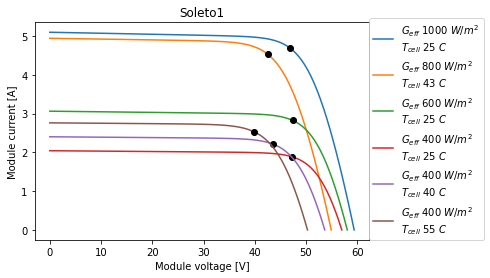

       i_sc       v_oc      i_mp       v_mp        p_mp
0  5.099770  59.400651  4.689494  46.905751  219.964248
1  4.944163  54.926045  4.525945  42.594534  192.780508
2  3.063272  58.055325  2.825372  47.397766  133.916313
3  2.043319  56.987478  1.886511  47.285357   89.204359
4  2.402918  53.661026  2.211783  43.603041   96.440485
5  2.762517  50.289825  2.526551  39.947515  100.929418


11101

/home/vieri/anaconda3/envs/sample/lib/python3.8/site-packages/IPython/core/pylabtools.py:137: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


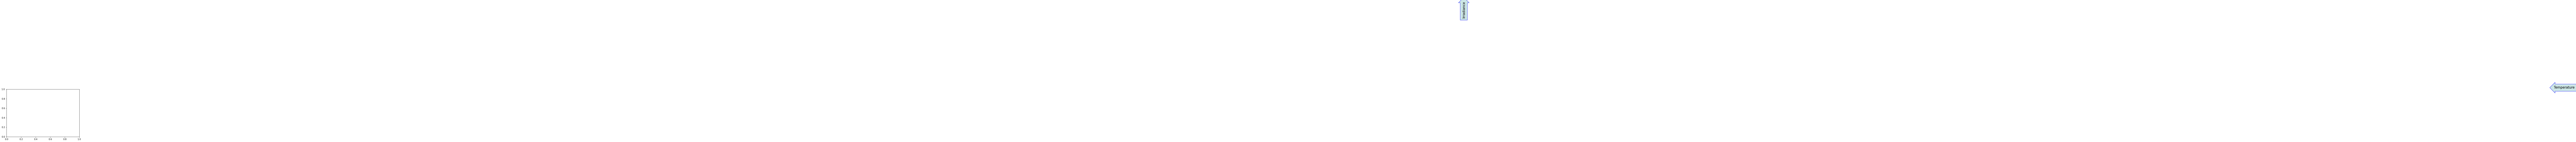

In [88]:
from pvlib import pvsystem
import pandas as pd
import matplotlib.pyplot as plt

# Example module parameters for the Canadian Solar CS5P-220M:
parameters = {
    'Name': 'Soleto1',
    'BIPV': 'N',
    'Date': '10/5/2009',
    'T_NOCT': 46,
    'A_c': 1.7, #check
    'N_s': 96, #check
    'I_sc_ref': 8.28,
    'V_oc_ref': 36.5,
    'I_mp_ref': 7.63,
    'V_mp_ref': 29.5,
    'alpha_sc': 0.06,
    'beta_oc': -0.37,
    'a_ref': 2.6373,
    'I_L_ref': 5.114,
    'I_o_ref': 8.196e-10,
    'R_s': 1.065,
    'R_sh_ref': 381.68,
    'Adjust': 8.7,
    'gamma_r': -0.476,
    'Version': 'MM106',
    'PTC': 200.1,
    'Technology': 'Mono-c-Si',
}

# adjust the reference parameters according to the operating
# conditions using the De Soto model:
IL, I0, Rs, Rsh, nNsVth = pvsystem.calcparams_desoto(
    conditions['Geff'],
    conditions['Tcell'],
    alpha_sc=parameters['alpha_sc'],
    a_ref=parameters['a_ref'],
    I_L_ref=parameters['I_L_ref'],
    I_o_ref=parameters['I_o_ref'],
    R_sh_ref=parameters['R_sh_ref'],
    R_s=parameters['R_s'],
    EgRef=1.121,
    dEgdT=-0.0002677
)

# plug the parameters into the SDE and solve for IV curves:
curve_info = pvsystem.singlediode(
    photocurrent=IL,
    saturation_current=I0,
    resistance_series=Rs,
    resistance_shunt=Rsh,
    nNsVth=nNsVth,
    ivcurve_pnts=100,
    method='lambertw'
)

# plot the calculated curves:
plt.figure()
for i, case in conditions.iterrows():
    label = (
        "$G_{eff}$ " + f"{case['Geff']} $W/m^2$\n"
        "$T_{cell}$ " + f"{case['Tcell']} $C$"
    )
    plt.plot(curve_info['v'][i], curve_info['i'][i], label=label)
    v_mp = curve_info['v_mp'][i]
    i_mp = curve_info['i_mp'][i]
    # mark the MPP
    plt.plot([v_mp], [i_mp], ls='', marker='o', c='k')

plt.legend(loc=(1.0, 0))
plt.xlabel('Module voltage [V]')
plt.ylabel('Module current [A]')
plt.title(parameters['Name'])
plt.show()
plt.gcf().set_tight_layout(True)


# draw trend arrows
def draw_arrow(ax, label, x0, y0, rotation, size, direction):
    style = direction + 'arrow'
    bbox_props = dict(boxstyle=style, fc=(0.8, 0.9, 0.9), ec="b", lw=1)
    t = ax.text(x0, y0, label, ha="left", va="bottom", rotation=rotation,
                size=size, bbox=bbox_props, zorder=-1)

    bb = t.get_bbox_patch()
    bb.set_boxstyle(style, pad=0.6)


ax = plt.gca()
draw_arrow(ax, 'Irradiance', 20, 2.5, 90, 15, 'r')
draw_arrow(ax, 'Temperature', 35, 1, 0, 15, 'l')

print(pd.DataFrame({
    'i_sc': curve_info['i_sc'],
    'v_oc': curve_info['v_oc'],
    'i_mp': curve_info['i_mp'],
    'v_mp': curve_info['v_mp'],
    'p_mp': curve_info['p_mp'],
}))
11101

### solving the 5 - params odm computing the 5 params at reference conditions v1

In [90]:
v_mp = 29.5
i_mp = 7.63
v_oc = 36.5
i_sc = 8.28
alpha_sc = 0.06 * i_sc
beta_voc = - 0.37 * v_oc
cells_in_series = 60

root_kwargs = {'method':'hybr'}

params = pvlib.ivtools.sdm.fit_desoto(v_mp, i_mp, v_oc, i_sc, alpha_sc, beta_voc, cells_in_series, EgRef=1.121, dEgdT=- 0.0002677, temp_ref=25, irrad_ref=1000, root_kwargs=root_kwargs)

RuntimeError: Parameter estimation failed:
The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

In [55]:
gamma_pmp

-101.28825

In [92]:
import pvlib

#gamma_pmp = (0.001 * 4.568 + -0.0158 * 3.3) / (4.568 * 3.3) * 100
gamma_pmp = -0.45
result = pvlib.ivtools.sdm.fit_cec_sam(
    celltype='polySi', v_mp=v_mp, i_mp=i_mp, v_oc=v_oc, i_sc=i_sc,
    alpha_sc=alpha_sc, beta_voc=beta_voc, gamma_pmp=gamma_pmp, cells_in_series=cells_in_series,
    temp_ref=25)

print(result)

#(3.5024746819107855, 2.3470813166776665e-12, 0.05508415040943549, 77.90679113571254, 0.1913501211018485, -10.655716001701359)


6parsolve simulation error
 : could not solve, check inputs


RuntimeError: Parameter estimation failed

### last try

In [85]:
import numpy as np
import pvlib
from pvmismatch import *
from pvmismatch.contrib import gen_coeffs

In [86]:
args = (i_sc, v_oc, i_mp, v_mp, cells_in_series, 1, 25.0)
x, sol = gen_coeffs.gen_two_diode(*args)
sol  # solution results

    fjac: array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]])
     fun: array([ 3.67875055e-05,  2.68132190e-03, -2.83103339e-04, -2.07825059e-05])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 435
    njev: 5
     qtf: array([nan, nan, nan, nan])
       r: array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])
  status: 5
 success: False
       x: array([-2.19061374e+001, -1.09624967e+001,  6.27786979e-002,
        9.81404388e+119])

In [84]:
def last_guess(sol):
    isat1 = np.exp(sol.x[0])
    isat2 = np.exp(sol.x[1])
    rs = sol.x[2] ** 2.0
    rsh = sol.x[3] ** 2.0
    return isat1, isat2, rs, rsh

x = last_guess(sol)
# (4.949484718740044e-10,
#  1.0622532408228556e-06,
#  0.0055266539292632725,
#  37.420383187251204)
# these don't actually seem that bad, so no changes required
print(x)
# restart the solver
x, sol = gen_coeffs.gen_two_diode(*args, x0=x)
#    fjac: array([[-7.60870868e-01, -4.58108789e-02, -6.47284239e-01,
#         3.72235582e-07],
#       [ 6.40027744e-01, -2.17398354e-01, -7.36954844e-01,
#        -2.37286186e-05],
#       [ 1.06957980e-01,  9.75007332e-01, -1.94732309e-01,
#         1.43209394e-04],
#       [-1.52809906e-07,  1.44771721e-04, -1.06415178e-05,
#        -9.99999989e-01]])
#     fun: array([ 1.97339520e-08,  6.92527653e-08,  7.86377008e-09, -2.31607963e-06])
# message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
#    nfev: 11
#    njev: 2
#     qtf: array([-2.32784758e-08, -8.16544653e-09,  6.77696431e-08,  2.31608954e-06])
#       r: array([ 1.13359731e+01,  2.76160043e-01,  2.15419870e+02, -6.66722799e-03,
#        1.04100761e-01,  2.43542797e+02, -2.39314749e-04,  3.97725352e+01,
#        4.44961882e-03,  7.68389446e-07])
#  status: 5
# success: False
#       x: array([-21.42656746, -13.75511821,   0.07434147,   6.11722022])

(3.063976491271572e-10, 1.7339962748794638e-05, 0.003941164909215506, 9.631545731222588e+239)


In [82]:
sol

    fjac: array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]])
     fun: array([ 3.67875055e-05,  2.68132190e-03, -2.83103339e-04, -2.07825059e-05])
 message: 'The iteration is not making good progress, as measured by the \n  improvement from the last ten iterations.'
    nfev: 11
    njev: 2
     qtf: array([nan, nan, nan, nan])
       r: array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])
  status: 5
 success: False
       x: array([-2.19061374e+001, -1.09624967e+001,  6.27786979e-002,
        9.81404388e+119])

In [ ]:
x = last_guess(sol)
# (4.949484718740044e-10,
#  1.0622532408228556e-06,
#  0.0055266539292632725,
#  37.420383187251204)
# exactly the same

x, sol = gen_coeffs.gen_two_diode(*args, x0=x)
# this time sol is exactly the same, so it's not going to change unless we change x0

# instead take a look at sol.fun
# array([ 1.97339520e-08,  6.92527653e-08,  7.86377008e-09, -2.31607963e-06])
# these are very small numbers, so let's just try the last guess in a PVcell and see how well it fits?

pvc = pvcell.PVcell(Isat1_T0=x[0], Isat2_T0=x[1], Rs=x[2], Rsh=x[3], Isc0_T0=pvmod.Isco, alpha_Isc=pvmod.Aisc)

pvc.Isc
# 8.6388 [A] ha-ha! this is always exactly the same because it's an argument to PVcell
pvmod.Isco
# 8.6388 [A]

pvc.Voc*72
# 43.59529549470483 [V]
pvmod.Voco
# 43.5918 [V] so off by about 0.01% off, that is really close! 

mpp = np.argmax(pvc.Pcell)  # find the index of the max power point

pvc.Icell[mpp]
# array([8.12227748])
pvmod.Impo
# 8.1359 [A] so this is off by about 0.17%, not zero but not too shabby

pvc.Vcell[mpp]*72
# array([35.01088617])
pvmod.Vmpo
# 34.9531 [V] also about 0.17% off, which is pretty good

# check the fill factor:
(pvmod.Impo * pvmod.Vmpo) / pvmod.Isco / pvmod.Voco
# 0.7551497439448178
(pvc.Icell[mpp] * pvc.Vcell[mpp]) / pvc.Isc / pvc.Voc
# array([0.75507116])

### solving the 5 - params odm computing the 5 params at reference conditions v2

In [7]:
import pvlib

In [8]:
ivcurves = {'i': [[8.28, 7.63, 0]], 'v': [[0, 29.5, 36.5]], 'ee':[1000], 'tc':[25], 'i_sc':[0.28], 'v_oc': [36.5], 'i_mp':[7.63], 'v_mp': [29.5]}

In [9]:
specs = {'cells_in_series': 60, 'alpha_sc': 0.06,'beta_voc': - 0.37}

In [38]:
pvlib.ivtools.sdm.fit_desoto_sandia(ivcurves, specs, const=None, maxiter=5, eps1=0.001)

TypeError: 'float' object is not subscriptable

# UNIGE

##### parameters

In [ ]:
ivcurves (dict) –

iarray
One array element for each IV curve. The jth element is itself an array of current for jth IV curve (same length as v[j]) [A]

varray
One array element for each IV curve. The jth element is itself an array of voltage for jth IV curve (same length as i[j]) [V]

eearray
effective irradiance for each IV curve, i.e., POA broadband irradiance adjusted by solar spectrum modifier [W / m^2]

tcarray
cell temperature for each IV curve [C]

i_scarray
short circuit current for each IV curve [A]

v_ocarray
open circuit voltage for each IV curve [V]

i_mparray
current at max power point for each IV curve [A]

v_mparray
voltage at max power point for each IV curve [V]

specs (dict) –

cells_in_seriesint
number of cells in series

alpha_scfloat
temperature coefficient of Isc [A/C]

beta_vocfloat
temperature coefficient of Voc [V/C]

const (dict) –

E0float
effective irradiance at STC, default 1000 [W/m^2]

T0float
cell temperature at STC, default 25 [C]

kfloat
1.38066E-23 J/K (Boltzmann’s constant)

qfloat
1.60218E-19 Coulomb (elementary charge)

maxiter (int, default 5) – input that sets the maximum number of iterations for the parameter updating part of the algorithm.

eps1 (float, default 1e-3) – Tolerance for the IV curve fitting. The parameter updating stops when absolute values of the percent change in mean, max and standard deviation of Imp, Vmp and Pmp between iterations are all less than eps1, or when the number of iterations exceeds maxiter.

### computing the generic 5 params and i-v characteristics points according to different (w,t) couples

In [106]:
nc=60                                #%number of cells in the panel
ns=16                                #%number of strings in series
np=21                                #%number of strings in parallel

T = 25
T = T+273.15                         #%[K] Panel Temperature 
G = 1000                             #%[W/m^2] Irradiance
Voc = (36.81-(0.116)*(T-298.15))/nc  #%[V] Open Circuit Voltage
Isc = 8.32+(5.425e-3)*(T-298.15)     #%[A] Short-Circuit current
Iph = Isc*G/1000                     #%[A] Photocurrent
I0 = 2.4*0.182e-6                    #%[A] Diode current
Rs = 4.05e-04                        #%[Ohm] Series Resistance
Rsh = 284*1000/G                     #%[Ohm] Shunt resistance
n = 1.418                            #%[-] Ideality factor
k_B = 1.38e-23                       #%[m2 kg s-2 K-1] Boltzmann Constant
q=1.60e-19                           #%[C] elementary charge

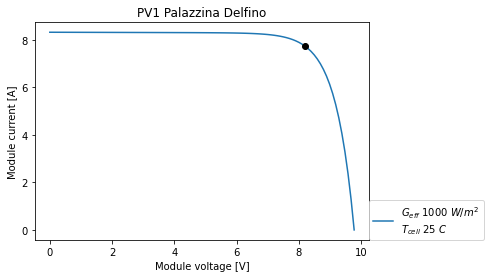

       i_sc     v_oc      i_mp     v_mp       p_mp  Fill Factor
0  8.319988  9.77733  7.745574  8.18702  63.413172     0.779537


/home/vieri/anaconda3/envs/sample/lib/python3.8/site-packages/IPython/core/pylabtools.py:137: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.canvas.print_figure(bytes_io, **kw)


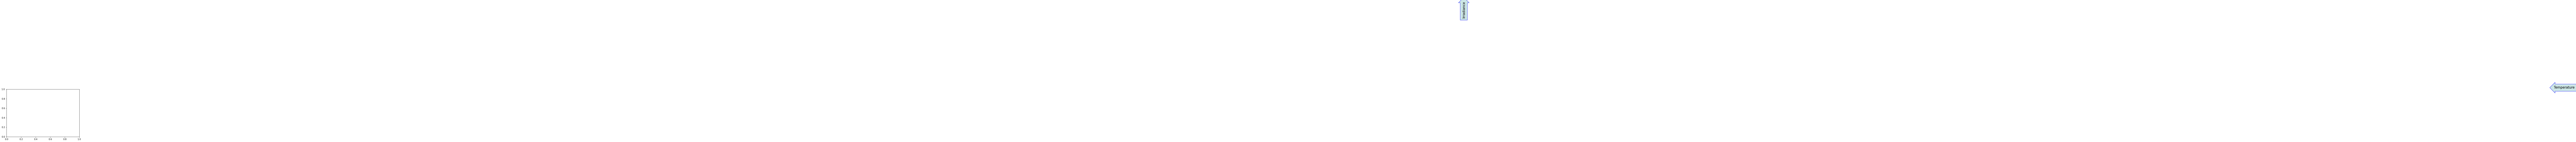

In [107]:
from pvlib import pvsystem
import pandas as pd
import matplotlib.pyplot as plt

# Example module parameters for the Canadian Solar CS5P-220M:
parameters = {
    'Name': 'PV1 Palazzina Delfino',
    'I_sc_ref': Isc,
    'V_oc_ref': Voc,
    'alpha_sc': 0.06,
    'a_ref': n*k_B*T*ns/q,
    'I_L_ref': Iph,
    'I_o_ref': I0,
    'R_s': Rs,
    'R_sh_ref': Rsh
}

cases = [
    (1000, 25)
#    (800, 43)
#    (600, 25),
#    (400, 25),
#    (400, 40),
#    (400, 55)
]

conditions = pd.DataFrame(cases, columns=['Geff', 'Tcell'])

# adjust the reference parameters according to the operating
# conditions using the De Soto model:
IL, I0, Rs, Rsh, nNsVth = pvsystem.calcparams_desoto(
    conditions['Geff'],
    conditions['Tcell'],
    alpha_sc=parameters['alpha_sc'],
    a_ref=parameters['a_ref'],
    I_L_ref=parameters['I_L_ref'],
    I_o_ref=parameters['I_o_ref'],
    R_sh_ref=parameters['R_sh_ref'],
    R_s=parameters['R_s'],
    EgRef=1.121,
    dEgdT=-0.0002677
)

# plug the parameters into the SDE and solve for IV curves:
curve_info = pvsystem.singlediode(
    photocurrent=IL,
    saturation_current=I0,
    resistance_series=Rs,
    resistance_shunt=Rsh,
    nNsVth=nNsVth,
    ivcurve_pnts=100,
    method='lambertw'
)

# plot the calculated curves:
plt.figure()
for i, case in conditions.iterrows():
    label = (
        "$G_{eff}$ " + f"{case['Geff']} $W/m^2$\n"
        "$T_{cell}$ " + f"{case['Tcell']} $C$"
    )
    plt.plot(curve_info['v'][i], curve_info['i'][i], label=label)
    v_mp = curve_info['v_mp'][i]
    i_mp = curve_info['i_mp'][i]
    # mark the MPP
    plt.plot([v_mp], [i_mp], ls='', marker='o', c='k')

plt.legend(loc=(1.0, 0))
plt.xlabel('Module voltage [V]')
plt.ylabel('Module current [A]')
plt.title(parameters['Name'])
plt.show()
plt.gcf().set_tight_layout(True)


# draw trend arrows
def draw_arrow(ax, label, x0, y0, rotation, size, direction):
    style = direction + 'arrow'
    bbox_props = dict(boxstyle=style, fc=(0.8, 0.9, 0.9), ec="b", lw=1)
    t = ax.text(x0, y0, label, ha="left", va="bottom", rotation=rotation,
                size=size, bbox=bbox_props, zorder=-1)

    bb = t.get_bbox_patch()
    bb.set_boxstyle(style, pad=0.6)


ax = plt.gca()
draw_arrow(ax, 'Irradiance', 20, 2.5, 90, 15, 'r')
draw_arrow(ax, 'Temperature', 35, 1, 0, 15, 'l')

print(pd.DataFrame({
    'i_sc': curve_info['i_sc'],
    'v_oc': curve_info['v_oc'],
    'i_mp': curve_info['i_mp'],
    'v_mp': curve_info['v_mp'],
    'p_mp': curve_info['p_mp'],
    'Fill Factor': (curve_info['i_mp']*curve_info['v_mp'])/(curve_info['i_sc']*curve_info['v_oc'])
}))

##### debug

In [ ]:
Vi=nc.*V.*ns
P=Vi.*np.*y

In [112]:
curve_info['v'][0] = curve_info['v'][0]*nc*ns

In [113]:
curve_info['i'][0] = curve_info['i'][0]*np

In [141]:
power_array = curve_info['v'][0]*curve_info['i'][0]

In [142]:
max(power_array)

1278406.952263809

In [129]:
mask = power_array == 1278406.952263809

In [133]:
power_array == 1278406.952263809

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [140]:
power_array = max(power_array)

In [138]:
np.where(power_array == max(power_array))[0]

AttributeError: 'int' object has no attribute 'where'

In [122]:
max(curve_info['v'][0]*curve_info['i'][0])

1278406.952263809